<a href="https://colab.research.google.com/github/schauppi/Udemy_Tensorflow/blob/schauppi/Machine_Learning_and_Neurons/linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_breast_cancer()

In [6]:
for key, value in data.items() :
    print (key)

data
target
target_names
DESCR
feature_names
filename


In [9]:
x_data = data["data"]
y_data = data["target"]
print(x_data.shape)
print(y_data.shape)

(569, 30)
(569,)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(426, 30)
(426,)
(143, 30)
(143,)
[1.747e+01 2.468e+01 1.161e+02 9.846e+02 1.049e-01 1.603e-01 2.159e-01
 1.043e-01 1.538e-01 6.365e-02 1.088e+00 1.410e+00 7.337e+00 1.223e+02
 6.174e-03 3.634e-02 4.644e-02 1.569e-02 1.145e-02 5.120e-03 2.314e+01
 3.233e+01 1.553e+02 1.660e+03 1.376e-01 3.830e-01 4.890e-01 1.721e-01
 2.160e-01 9.300e-02]


In [22]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
print(x_train[0])
input_shape = x_train[0].shape

[ 0.9240074   1.28096174  0.96889258  0.91030746  0.61580406  1.05679748
  1.58818775  1.38251265 -1.00351781  0.18126171  2.42836202  0.37029818
  2.21476218  1.87634222 -0.25086755  0.66347155  0.6102571   0.72242871
 -1.07460266  0.67697033  1.38391425  1.10828382  1.39346916  1.34995538
  0.25351759  0.8034565   1.04801913  0.8476574  -1.19048541  0.54133454]


In [27]:
model = keras.models.Sequential([
                                 keras.layers.Input(shape=input_shape),
                                 keras.layers.Dense(128, activation="relu"),
                                 keras.layers.Dense(1, activation="sigmoid")
])

In [28]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [40]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=0)

In [41]:
print("Train score: ", model.evaluate(x_train, y_train))
print("Test score: ", model.evaluate(x_test, y_test))

14/14 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Train score:  [0.0018813818460330367, 1.0]
5/5 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9790
Test score:  [0.20990046858787537, 0.9790209531784058]


In [42]:
import matplotlib.pyplot as plt
#history.history

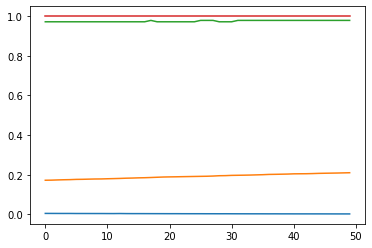

In [43]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.plot(history.history["accuracy"], label="acc")